# **Home Credit Analysis**

## **Data and Packages Load**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing
from sklearn.preprocessing import OneHotEncoder
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv('/content/drive/My Drive/home-credit-default-risk/application_train.csv')

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bureau = pd.read_csv('/content/drive/My Drive/home-credit-default-risk/bureau.csv')

## **Data Pre-Processing and Cleaning**

In [ ]:
bureau.info(verbose=True, null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

In [ ]:
bureau.iloc[:,8:17] = bureau.iloc[:,8:17].fillna(0)

In [ ]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.00,0.0,0.0,0.0,Consumer credit,-131,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,0.0,0,225000.00,171342.0,0.0,0.0,Credit card,-20,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,0.0,0,464323.50,0.0,0.0,0.0,Consumer credit,-16,0.0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,0.0,0,90000.00,0.0,0.0,0.0,Credit card,-16,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,0.0,0.0,0.0,Consumer credit,-21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,0.0
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,0.0
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,0.0,0,15570.00,0.0,0.0,0.0,Consumer credit,-967,0.0
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,0.0,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,0.0


In [ ]:
bureau = bureau.loc[:,['SK_ID_CURR', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_OVERDUE']].groupby('SK_ID_CURR').quantile(0.75)

In [ ]:
bureau.reset_index(inplace=True)

In [ ]:
bureau

,SK_ID_CURR,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_OVERDUE
0,100001,0.0000,0.0
1,100002,860.6250,0.0
2,100003,0.0000,0.0
3,100004,0.0000,0.0
4,100005,0.0000,0.0
...,...,...,...
305806,456249,0.0000,0.0
305807,456250,0.0000,0.0
305808,456253,0.0000,0.0
305809,456254,0.0000,0.0


In [ ]:
df = pd.merge(bureau.loc[:,['SK_ID_CURR', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_OVERDUE']], df, on='SK_ID_CURR', how='right')

In [ ]:
df.info(verbose=True, null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 124 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    AMT_CREDIT_MAX_OVERDUE        263491 non-null  float64
 2    AMT_CREDIT_SUM_OVERDUE        263491 non-null  float64
 3    TARGET                        307511 non-null  int64  
 4    NAME_CONTRACT_TYPE            307511 non-null  object 
 5    CODE_GENDER                   307511 non-null  object 
 6    FLAG_OWN_CAR                  307511 non-null  object 
 7    FLAG_OWN_REALTY               307511 non-null  object 
 8    CNT_CHILDREN                  307511 non-null  int64  
 9    AMT_INCOME_TOTAL              307511 non-null  float64
 10   AMT_CREDIT                    307511 non-null  float64
 11   AMT_ANNUITY                   307499 non-null  float64
 12   AMT_GOODS_PRICE             

In [ ]:
df.loc[:,['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_OVERDUE']] = df.loc[:,['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_OVERDUE']].fillna(0)
df.loc[:, 'EXT_SOURCE_2'] = df.loc[:, 'EXT_SOURCE_2'].fillna(df.loc[:, 'EXT_SOURCE_2'].median())
df.loc[:, 'OBS_30_CNT_SOCIAL_CIRCLE'] = df.loc[:, 'OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df.loc[:, 'OBS_30_CNT_SOCIAL_CIRCLE'].median())
df.loc[:, 'DEF_30_CNT_SOCIAL_CIRCLE'] = df.loc[:, 'DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df.loc[:, 'DEF_30_CNT_SOCIAL_CIRCLE'].median())
df.loc[:, 'OBS_60_CNT_SOCIAL_CIRCLE'] = df.loc[:, 'OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df.loc[:, 'OBS_60_CNT_SOCIAL_CIRCLE'].median())
df.loc[:, 'DEF_60_CNT_SOCIAL_CIRCLE'] = df.loc[:, 'DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df.loc[:, 'DEF_60_CNT_SOCIAL_CIRCLE'].median())

In [ ]:
df.dropna(subset=['CODE_GENDER'], inplace=True)
df.dropna(axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   AMT_CREDIT_MAX_OVERDUE       307511 non-null  float64
 2   AMT_CREDIT_SUM_OVERDUE       307511 non-null  float64
 3   TARGET                       307511 non-null  int64  
 4   NAME_CONTRACT_TYPE           307511 non-null  object 
 5   CODE_GENDER                  307511 non-null  object 
 6   FLAG_OWN_CAR                 307511 non-null  object 
 7   FLAG_OWN_REALTY              307511 non-null  object 
 8   CNT_CHILDREN                 307511 non-null  int64  
 9   AMT_INCOME_TOTAL             307511 non-null  float64
 10  AMT_CREDIT                   307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

## **Exploratory Data Analysis**

In [ ]:
obj_cols = list(df.select_dtypes(include=object).columns)

In [ ]:
for obj in obj_cols:
  print(df.groupby(obj).TARGET.apply(lambda x: (x == 1).mean()))

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64
CODE_GENDER
F      0.069993
M      0.101419
XNA    0.000000
Name: TARGET, dtype: float64
FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64
FLAG_OWN_REALTY
N    0.083249
Y    0.079616
Name: TARGET, dtype: float64
NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64
NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Name: TARGET, dtype: float64
NAME_FAMILY_STATUS
Civil marriage          0.099446
Married                 0.075599
Separated 

In [ ]:
for obj in obj_cols:
  print(df.groupby([obj])[obj].count())

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY
N     94199
Y    213312
Name: FLAG_OWN_REALTY, dtype: int64
NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71617
Maternity leave              5
Pensioner                55362
State servant            21703
Student                     18
Unemployed                  22
Working                 158774
Name: NAME_INCOME_TYPE, dtype: int64
NAME_EDUCATION_TYPE
Academic degree                     164
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Secondary / secondary special    218391
Name: NAME_EDUCATION_TYPE, dtype: int64
NAME_FAMILY_STATUS
Civil marriage           29775
Married                 196432
Separated      

In [ ]:
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(df.select_dtypes(include=object).copy()).toarray()
feature_labels = ohe.categories_

In [ ]:
feature_labels = ohe.get_feature_names_out()

In [ ]:
features = pd.DataFrame(feature_arr, columns=feature_labels)

In [ ]:
df = pd.concat([df.select_dtypes(exclude=object).copy(), features], axis=1)

In [ ]:
cols = list(df.columns)
a, b = cols.index('AMT_CREDIT_MAX_OVERDUE'), cols.index('TARGET')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]

## **Machine Learning**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:153], df.iloc[:,1], test_size=0.1, random_state=42)

In [ ]:
# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [ ]:
kbest = SelectKBest(k=10)
kbest.fit(X_train, y_train)

# See selected features
kbest_features = X_train.columns[kbest.get_support()]
print(f"===== {len(kbest_features)} features were selected =====")
print(f"{', '.join(kbest_features)}")

===== 10 features were selected =====
DAYS_BIRTH, DAYS_ID_PUBLISH, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, REG_CITY_NOT_WORK_CITY, EXT_SOURCE_2, CODE_GENDER_F, CODE_GENDER_M, NAME_INCOME_TYPE_Working, NAME_EDUCATION_TYPE_Higher education


In [ ]:
cols_used = list(kbest_features)

In [ ]:
def remove_neg(value):
  value = value * -1
  return value

In [ ]:
X_train.loc[:,['DAYS_BIRTH', 'DAYS_ID_PUBLISH']] = X_train.loc[:,['DAYS_BIRTH', 'DAYS_ID_PUBLISH']].apply(remove_neg)

In [ ]:
X_test.loc[:,['DAYS_BIRTH', 'DAYS_ID_PUBLISH']] = X_test.loc[:,['DAYS_BIRTH', 'DAYS_ID_PUBLISH']].apply(remove_neg)

In [ ]:
#importing and training the model
lr = LogisticRegression(solver='newton-cg', random_state=42)
lr.fit(X_train[cols_used], y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

LogisticRegression(random_state=42, solver='newton-cg')

The f1 score for the testing data: 0.0


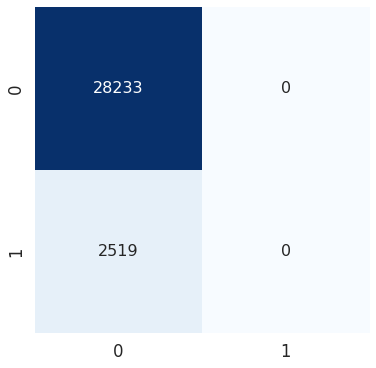

In [ ]:
# Predicting on the test data
pred_test = lr.predict(X_test[cols_used])

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

In [ ]:
tr = tree.DecisionTreeClassifier()
tr.fit(X_train[cols_used], y_train)

DecisionTreeClassifier()

The f1 score for the testing data: 0.12360844529750481


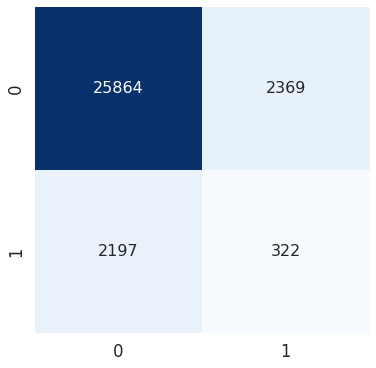

In [ ]:
# Predicting on the test data
pred_test = tr.predict(X_test[cols_used])

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

## **Test Data Prediction**

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/home-credit-default-risk/application_test.csv')

In [ ]:
cols_used

['DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Higher education']

In [ ]:
df_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    48744 non-null  int64  
 1    NAME_CONTRACT_TYPE            48744 non-null  object 
 2    CODE_GENDER                   48744 non-null  object 
 3    FLAG_OWN_CAR                  48744 non-null  object 
 4    FLAG_OWN_REALTY               48744 non-null  object 
 5    CNT_CHILDREN                  48744 non-null  int64  
 6    AMT_INCOME_TOTAL              48744 non-null  float64
 7    AMT_CREDIT                    48744 non-null  float64
 8    AMT_ANNUITY                   48720 non-null  float64
 9    AMT_GOODS_PRICE               48744 non-null  float64
 10   NAME_TYPE_SUITE               47833 non-null  object 
 11   NAME_INCOME_TYPE              48744 non-null  object 
 12   NAME_EDUCATION_TYPE           48744 non-null

In [ ]:
df_test.loc[:, 'EXT_SOURCE_2'] = df_test.loc[:, 'EXT_SOURCE_2'].fillna(df_test.loc[:, 'EXT_SOURCE_2'].quantile(0.8))

In [ ]:
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(df_test.select_dtypes(include=object).copy()).toarray()
feature_labels = ohe.categories_

In [ ]:
feature_labels = ohe.get_feature_names_out()

In [ ]:
features = pd.DataFrame(feature_arr, columns=feature_labels)

In [ ]:
df_test = pd.concat([df_test.select_dtypes(exclude=object).copy(), features], axis=1)

In [ ]:
df_test.loc[:, 'TARGET'] = lr.predict(df_test[cols_used])

In [ ]:
submission_lr = df_test.loc[:, ['SK_ID_CURR', 'TARGET']]

In [ ]:
submission_lr[submission_lr['TARGET'] == 0]

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [ ]:
df_test.loc[:, 'TARGET'] = tr.predict(df_test[cols_used])

In [ ]:
submission_tr = df_test.loc[:, ['SK_ID_CURR', 'TARGET']]

In [ ]:
submission_tr[submission_tr['TARGET'] == 0]

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
4,100038,0
8,100066,0
...,...,...
48734,456168,0
48735,456169,0
48736,456170,0
48737,456189,0


In [ ]:
submission_tr.to_csv('/content/drive/My Drive/Assignment/Home_Credit_Indonesia/submission.csv', index=False)

## **Key Visualization**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/home-credit-default-risk/application_train.csv')

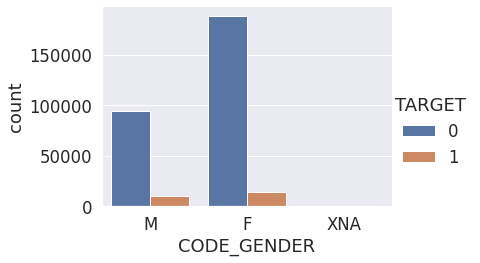

In [ ]:
sns.catplot(x='CODE_GENDER', hue='TARGET', data=df, kind="count", height=4, aspect=1.5)

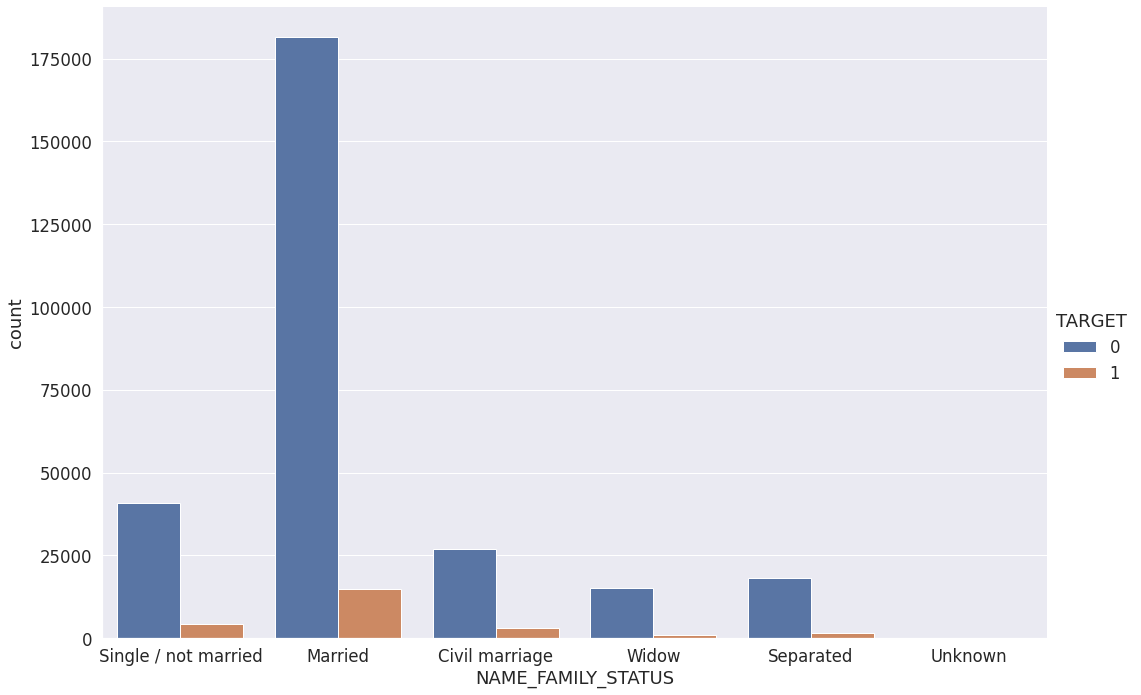

In [ ]:
sns.catplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=df, kind="count", height=10, aspect=1.5)

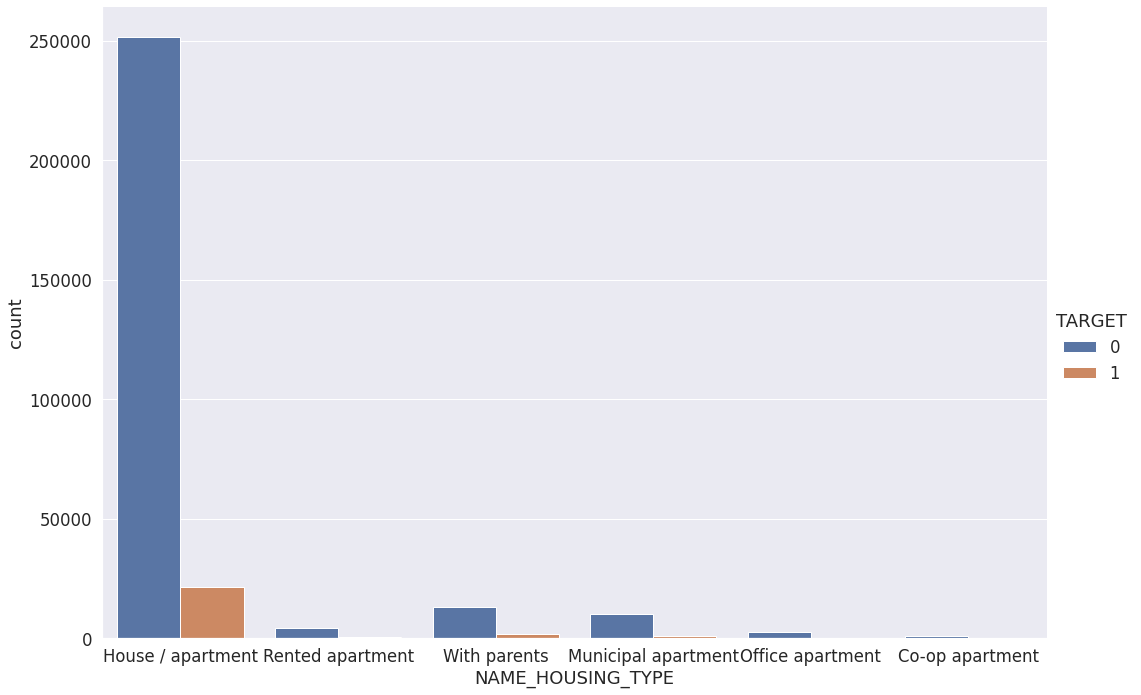

In [ ]:
sns.catplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df, kind="count", height=10, aspect=1.5)

In [ ]:
sns.catplot(x='ORGANIZATION_TYPE', hue='TARGET', data=df, kind="count", height=100, aspect=1.5)